<center><b> <font color = 'darkblue', size = 8>
Real Estate Valuation
<center/><b/>

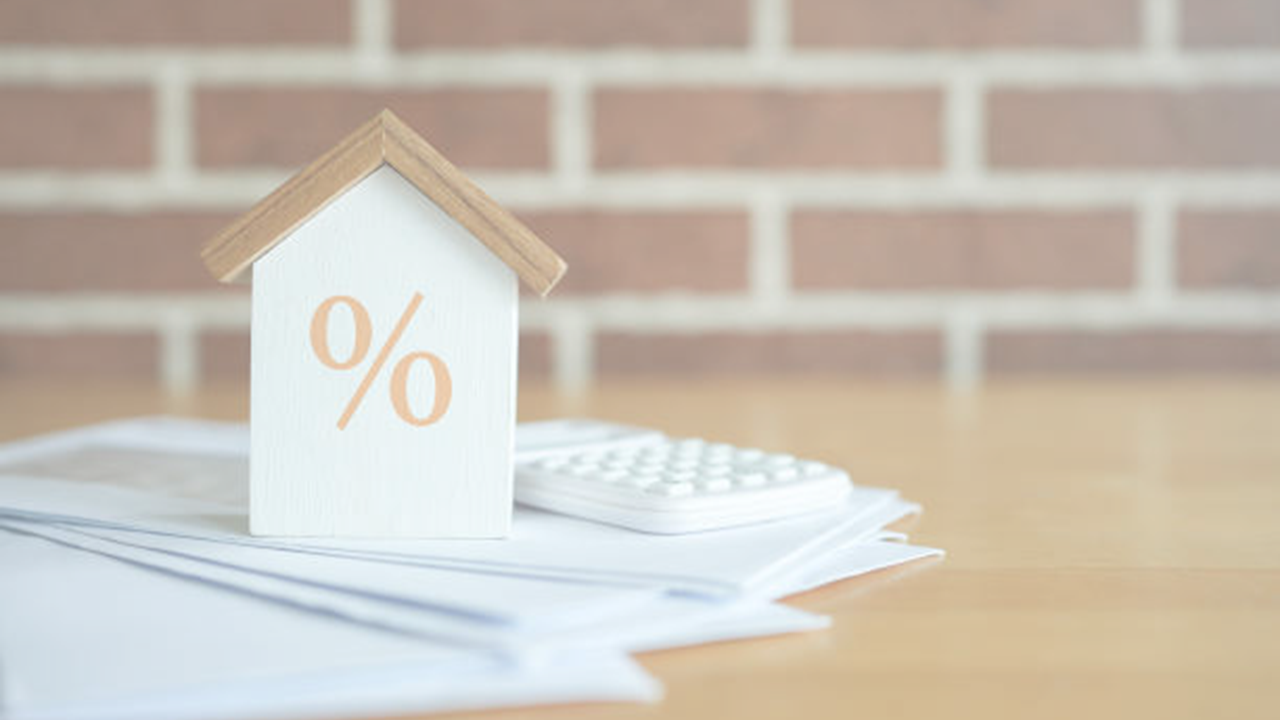

In [1]:
from IPython.display import display, Image

display(Image('RealEstateValuationCover.png'))

## Summary

The objective of this project is to build an estimation model for real estate valuation, specifically estimating the House Price per Unit Area (referred to as "Y house price of unit area"). By analyzing various property and locational characteristics, the model aims to provide reliable price estimates, supporting decision-making in real estate transactions. The following features are used as estimators in the model, selected for their impact on property values:

1. 'X1 transaction date': the date of transaction (eg.: 2013.250 = march 2013; 2013.500 = june) (numerical: float);
2. 'X2 house age': the age of the property, in years, at the time of transaction (numerical: float);
3. 'X3 distance to the nearest MRT station': distance from the property to the closest Mass Rapid Transit (MRT) station, in meters, reflecting the influence of transit accessibility on property value (numerical: float);
4. 'X4 number of convenience stores' : count of convenience stores near the property, representing access to local amenities that may affect desirability (numerical: integer);
5. 'X5 latitude' and 'X6 longitude': the geographical coordinates of the property, allowing for spatial analysis of location-based factors (numerical: float);

## Dependencies

In [2]:
# Data manipulation

import numpy as np
import pandas as pd
import regex as re

# Plotting
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# Statistical modeling and preprocessing
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from eval_models.eval_models import filter_cols_by_outliers # Custom function to retrieve columns names without and with outliers

# Ignoring warnings

from warnings import filterwarnings as fw
fw('ignore')

## Exploratory Data Analysis

In [3]:
# Rading the dataset as a pandas dataframe

df = pd.read_csv('RealEstateValuationDataset.csv')
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
# Main information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [5]:
# Renaming the columns

pattern = r'\w\d?\s([\w\s]+)'
columns_transformed = [re.findall(pattern, col)[0].replace(' ', '_') for col in list(df.columns)]
df.columns = columns_transformed
df.head()

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
# Statistical Summary

df.describe()

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


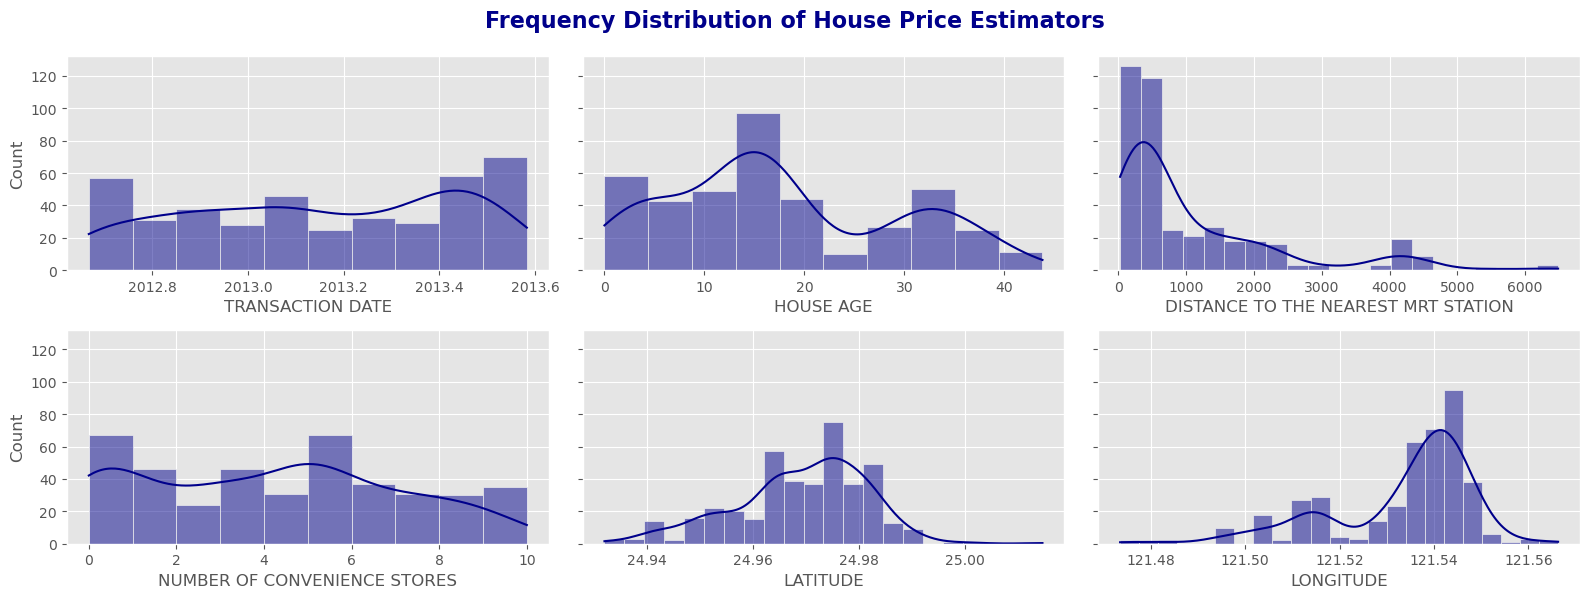

In [7]:
# Frequency distribution of house price estimators

labels_on_plots = [j.replace('_', ' ').upper() for j in columns_transformed]

fig, axes = plt.subplots(ncols = 3, nrows = 2, sharey = True, figsize = (16, 6))

for i, ax in enumerate(axes.flatten()):
    sns.histplot(df, x = columns_transformed[i], kde = True,
                color = 'darkblue', ax = ax)
    ax.set_xlabel(labels_on_plots[i])

plt.suptitle('Frequency Distribution of House Price Estimators', 
             y = .99, fontsize = 16, fontweight = 'bold', color = 'Darkblue')
plt.tight_layout()
plt.show()

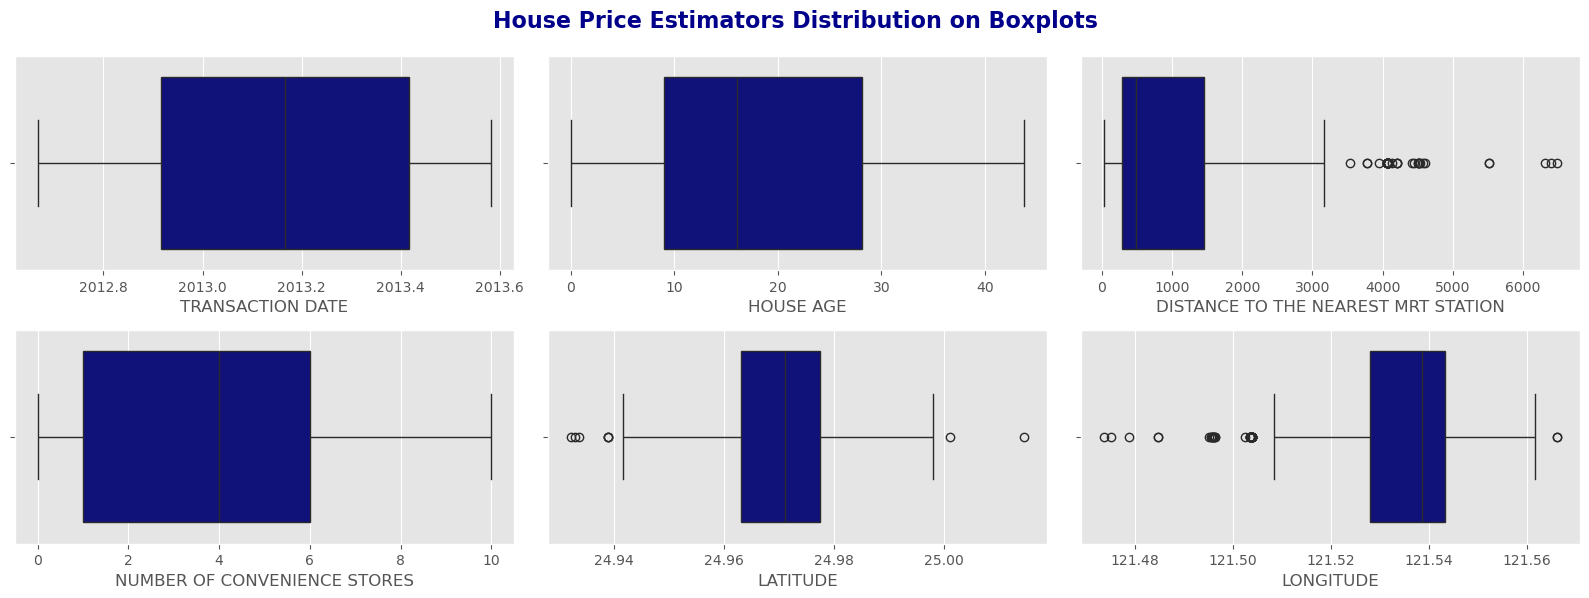

In [8]:
# House price estimators on boxplots

fig, axes = plt.subplots(ncols = 3, nrows = 2, sharey = True, figsize = (16, 6))

for i, ax in enumerate(axes.flatten()):
    sns.boxplot(df, x = columns_transformed[i],
                color = 'darkblue', ax = ax)
    ax.set_xlabel(labels_on_plots[i])

plt.suptitle('House Price Estimators Distribution on Boxplots', 
             y = .99, fontsize = 16, fontweight = 'bold', color = 'Darkblue')
plt.tight_layout()
plt.show()

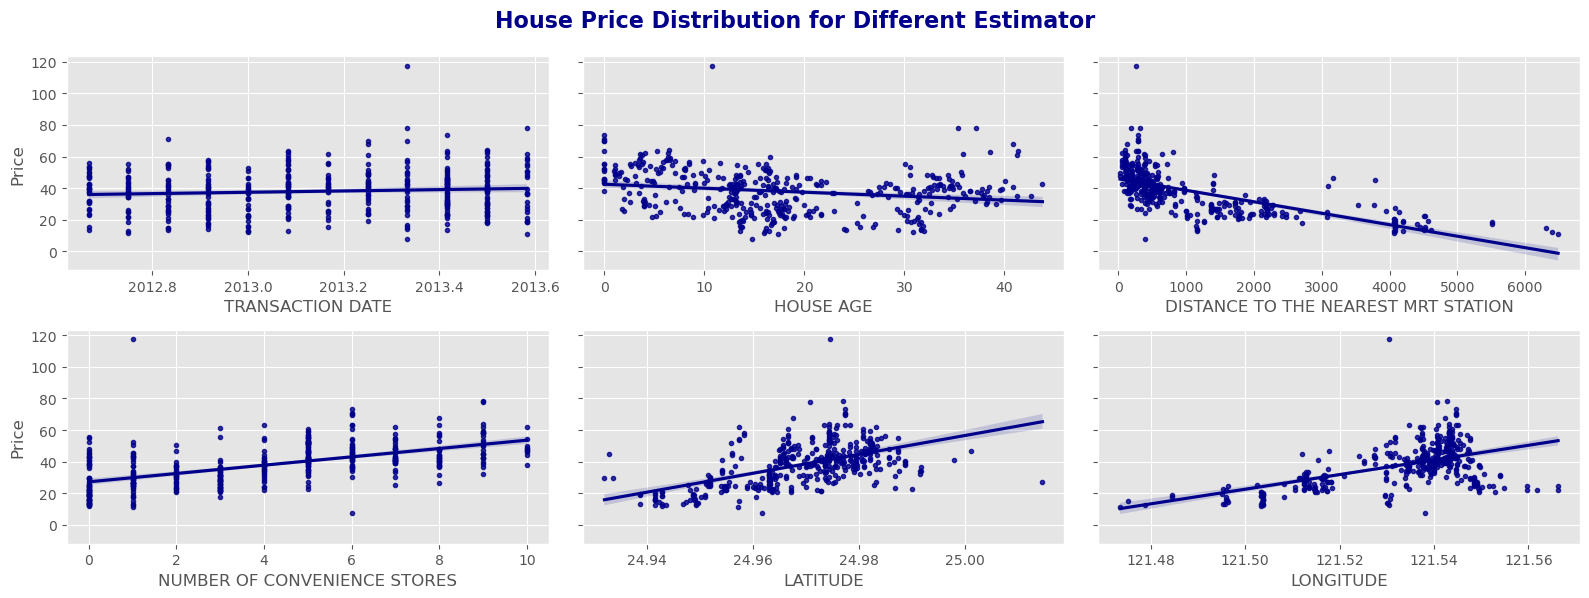

In [9]:
# House Price Distribution for Different Estimator

fig, axes = plt.subplots(ncols = 3, nrows = 2, sharey = True, figsize = (16, 6))

for i, ax in enumerate(axes.flatten()):
    sns.regplot(df, x = columns_transformed[i], y = columns_transformed[-1], 
                marker = '.', color = 'darkblue', ax = ax)
    ax.set_ylabel('')
    ax.set_xlabel(labels_on_plots[i])
axes[0, 0].set_ylabel('Price')  
axes[1, 0].set_ylabel('Price')

plt.suptitle('House Price Distribution for Different Estimator', 
             y = .99, fontsize = 16, fontweight = 'bold', color = 'Darkblue')
plt.tight_layout()
plt.show()

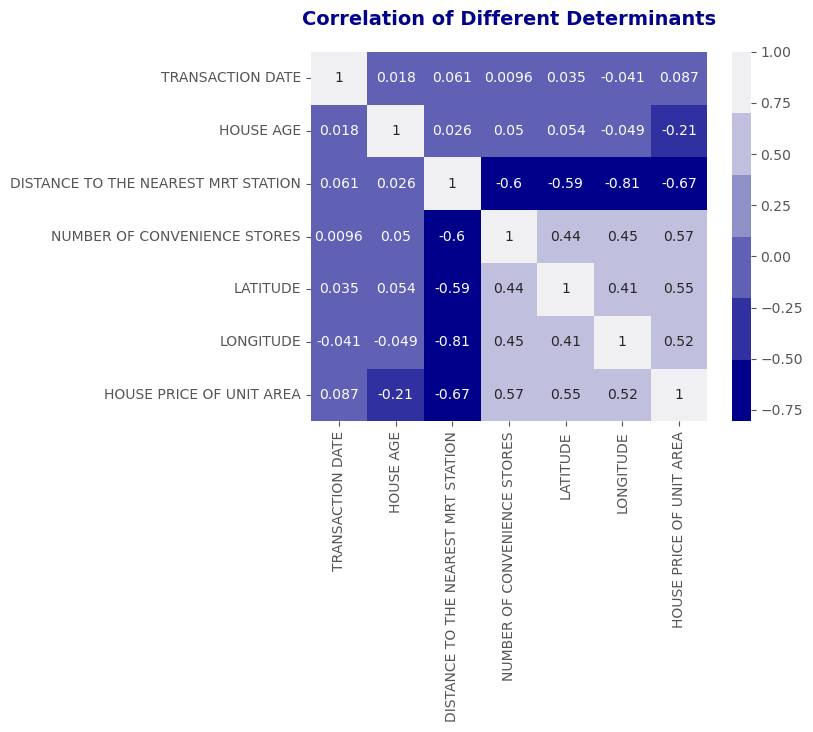

In [10]:
# Correlation Matrix

c_map = sns.light_palette('darkblue', reverse = True, as_cmap = False) # customizing the color map

sns.heatmap(df.corr(), annot = True, cmap = c_map,
           xticklabels = labels_on_plots,  yticklabels = labels_on_plots)
plt.title('Correlation of Different Determinants', 
          fontsize = 14, fontweight = 'bold', y = 1.05, color = 'darkblue')
plt.show()

## Preprocessing and Statistical Modeling

In [11]:
# Output and estimators sets

X, y = df.iloc[:, :-1], df.house_price_of_unit_area
X

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [12]:
# Filtering columns with and without outliers

cols_with_outliers, cols_without_outliers = filter_cols_by_outliers(X)
print(f'Estimators with significant outliers: {cols_with_outliers}\nStable Estimators: {cols_without_outliers}')

Estimators with significant outliers: ['distance_to_the_nearest_MRT_station', 'latitude', 'longitude']
Stable Estimators: ['transaction_date', 'house_age', 'number_of_convenience_stores']


In [13]:
# Transformer for scaling attributes values

transformer = ColumnTransformer(transformers = [
    ('scaler_rob', RobustScaler(), cols_with_outliers),
    ('scaler_std', StandardScaler(), cols_without_outliers)
])

transformer.fit(X) # Fitting the transformer

ColumnTransformer(transformers=[('scaler_rob', RobustScaler(),
                                 ['distance_to_the_nearest_MRT_station',
                                  'latitude', 'longitude']),
                                ('scaler_std', StandardScaler(),
                                 ['transaction_date', 'house_age',
                                  'number_of_convenience_stores'])])

In [14]:
# Getting the columns after transformation

cols_name_prefix_size = len('scaler_std') + 2
transf_cols = [i[cols_name_prefix_size:] for i in transformer.get_feature_names_out()]
transf_cols

['distance_to_the_nearest_MRT_station',
 'latitude',
 'longitude',
 'transaction_date',
 'house_age',
 'number_of_convenience_stores']

In [15]:
# Estimator dataset after transformation

X_transf = pd.DataFrame(transformer.fit_transform(X), columns = transf_cols)
X_transf

,distance_to_the_nearest_MRT_station,latitude,longitude,transaction_date,house_age,number_of_convenience_stores
0,-0.349673,0.821861,0.105782,-0.823683,1.255628,2.007407
1,-0.159351,0.639225,0.057819,-0.823683,0.157086,1.667503
2,0.059876,1.131788,0.346912,1.541151,-0.387791,0.307885
3,0.059876,1.131788,0.346912,1.246435,-0.387791,0.307885
4,-0.087268,0.572120,0.250986,-1.121951,-1.117223,0.307885
...,...,...,...,...,...,...
409,3.081481,-2.044275,-2.287779,-0.528967,-0.352637,-1.391638
410,-0.344885,0.223452,0.293693,-1.711384,-1.064493,1.667503
411,-0.086923,0.562435,0.080815,0.358734,0.095568,0.987694
412,-0.332563,-0.301626,0.134034,-0.528967,-0.844784,0.307885


In [16]:
# Adding the constant term

X_transf_const = sm.add_constant(X_transf)
X_transf_const

,const,distance_to_the_nearest_MRT_station,latitude,longitude,transaction_date,house_age,number_of_convenience_stores
0,1.0,-0.349673,0.821861,0.105782,-0.823683,1.255628,2.007407
1,1.0,-0.159351,0.639225,0.057819,-0.823683,0.157086,1.667503
2,1.0,0.059876,1.131788,0.346912,1.541151,-0.387791,0.307885
3,1.0,0.059876,1.131788,0.346912,1.246435,-0.387791,0.307885
4,1.0,-0.087268,0.572120,0.250986,-1.121951,-1.117223,0.307885
...,...,...,...,...,...,...,...
409,1.0,3.081481,-2.044275,-2.287779,-0.528967,-0.352637,-1.391638
410,1.0,-0.344885,0.223452,0.293693,-1.711384,-1.064493,1.667503
411,1.0,-0.086923,0.562435,0.080815,0.358734,0.095568,0.987694
412,1.0,-0.332563,-0.301626,0.134034,-0.528967,-0.844784,0.307885


In [17]:
# Estimator model and statistical summary

estimator = sm.OLS(y, X_transf_const).fit()
estimator.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     house_price_of_unit_area   R-squared:                       0.582
Model:                                  OLS   Adj. R-squared:                  0.576
Method:                       Least Squares   F-statistic:                     94.59
Date:                      Mon, 28 Oct 2024   Prob (F-statistic):           4.86e-74
Time:                              16:33:11   Log-Likelihood:                -1487.0
No. Observations:                       414   AIC:                             2988.
Df Residuals:                           407   BIC:                             3016.
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  41.0365      0.509     80.565      0.000      40.035      42.038
distance_to_the_nearest_MRT_station    -5.2277      0.836     -6.250      0.000      -6.872      -3.583
latitude                                3.2592      0.644      5.059      0.000       1.993       4.526
longitude                              -0.1891      0.739     -0.256      0.798      -1.643       1.264
transaction_date                        1.4493      0.439      3.305      0.001       0.587       2.311
house_age                              -3.0688      0.438     -7.000      0.000      -3.931      -2.207
number_of_convenience_stores            3.3341      0.554      6.023      0.000       2.246       4.422
==============================================================================
Omnibus:                      231.634   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3599.138
Skew:                           2.026   Prob(JB):                         0.00
Kurtosis:                      16.865   Cond. No.                         4.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Statistically significant estimators at 5% of confidence level and their p-values

estimator.pvalues.to_frame('p_value').query('p_value <= .5')

,p_value
const,3.062986e-252
distance_to_the_nearest_MRT_station,1.038560e-09
latitude,6.383415e-07
transaction_date,1.033686e-03
house_age,1.064969e-11
number_of_convenience_stores,3.835416e-09


In [19]:
# Significant estimators list

sig_cols = list(estimator.pvalues.to_frame('p_value').query('p_value <= .5').index)
print(sig_cols)

['const', 'distance_to_the_nearest_MRT_station', 'latitude', 'transaction_date', 'house_age', 'number_of_convenience_stores']


In [20]:
# Significant estimator model and statistical summary

estimator_sig = sm.OLS(y, X_transf_const[sig_cols]).fit()
estimator_sig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     house_price_of_unit_area   R-squared:                       0.582
Model:                                  OLS   Adj. R-squared:                  0.577
Method:                       Least Squares   F-statistic:                     113.8
Date:                      Mon, 28 Oct 2024   Prob (F-statistic):           4.47e-75
Time:                              16:33:11   Log-Likelihood:                -1487.0
No. Observations:                       414   AIC:                             2986.
Df Residuals:                           408   BIC:                             3010.
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  41.0255      0.507     80.923      0.000      40.029      42.022
distance_to_the_nearest_MRT_station    -5.0715      0.571     -8.887      0.000      -6.193      -3.950
latitude                                3.2796      0.639      5.136      0.000       2.024       4.535
transaction_date                        1.4461      0.438      3.303      0.001       0.585       2.307
house_age                              -3.0652      0.438     -7.003      0.000      -3.926      -2.205
number_of_convenience_stores            3.3425      0.552      6.056      0.000       2.257       4.428
==============================================================================
Omnibus:                      232.810   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3644.713
Skew:                           2.038   Prob(JB):                         0.00
Kurtosis:                      16.953   Cond. No.                         2.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  Data Provenance

<p>
    <strong>Source:</strong> 
    Dataset used in Analytics and Machine Learning class sessions, 
    Digital Business MBA program, University of São Paulo, 
    procured and instructed by Professor Luiz Paulo Fávero. 
    <a href = 'https://github.com/domingosdeeulariadumba/realestatevaluation/blob/main/RealEstateValuationDataset.csv' target = '_blank'>
        Real Estate Valuation Dataset.
    </a>
    June 2023.
</p>

                 ________  ________   _______   ______
                 /_  __/ / / / ____/  / ____/ | / / __ \
                  / / / /_/ / __/    / __/ /  |/ / / / /
                 / / / __  / /___   / /___/ /|  / /_/ /
                /_/ /_/ /_/_____/  /_____/_/ |_/_____/  
